In [2]:
from ultralytics import YOLO
import YoloLidarTools as ylt
import importlib
importlib.reload(ylt);
import numpy as np
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#!pip install roboflow
#from roboflow import Roboflow

matplotlib.rcParams['figure.figsize'] = (15,10)

In [3]:
# Check the GPU
!nvidia-smi

Fri Feb 23 20:56:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.54.03              Driver Version: 535.54.03    CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX A5000               On  | 00000000:02:00.0 Off |                  Off |
| 30%   30C    P8              22W / 230W |     23MiB / 24564MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
# create the yolo8n model and train
#   The yaml file is in './XXXX/data.yaml' while the data is in the folder './datasets/XXXX/data.yaml'
trial_name = 'train'
fname_yaml = 'LiDAR.v1i.yolov8/data.yaml'
retrain = False
if retrain == True:
    model = YOLO('yolov8m-seg.pt')
    model.train(data=fname_yaml, epochs=200, name=trial_name, exist_ok=True)
else:
    fname_model = './runs/segment/'+trial_name+'/weights/best.pt'
    model = YOLO(fname_model)

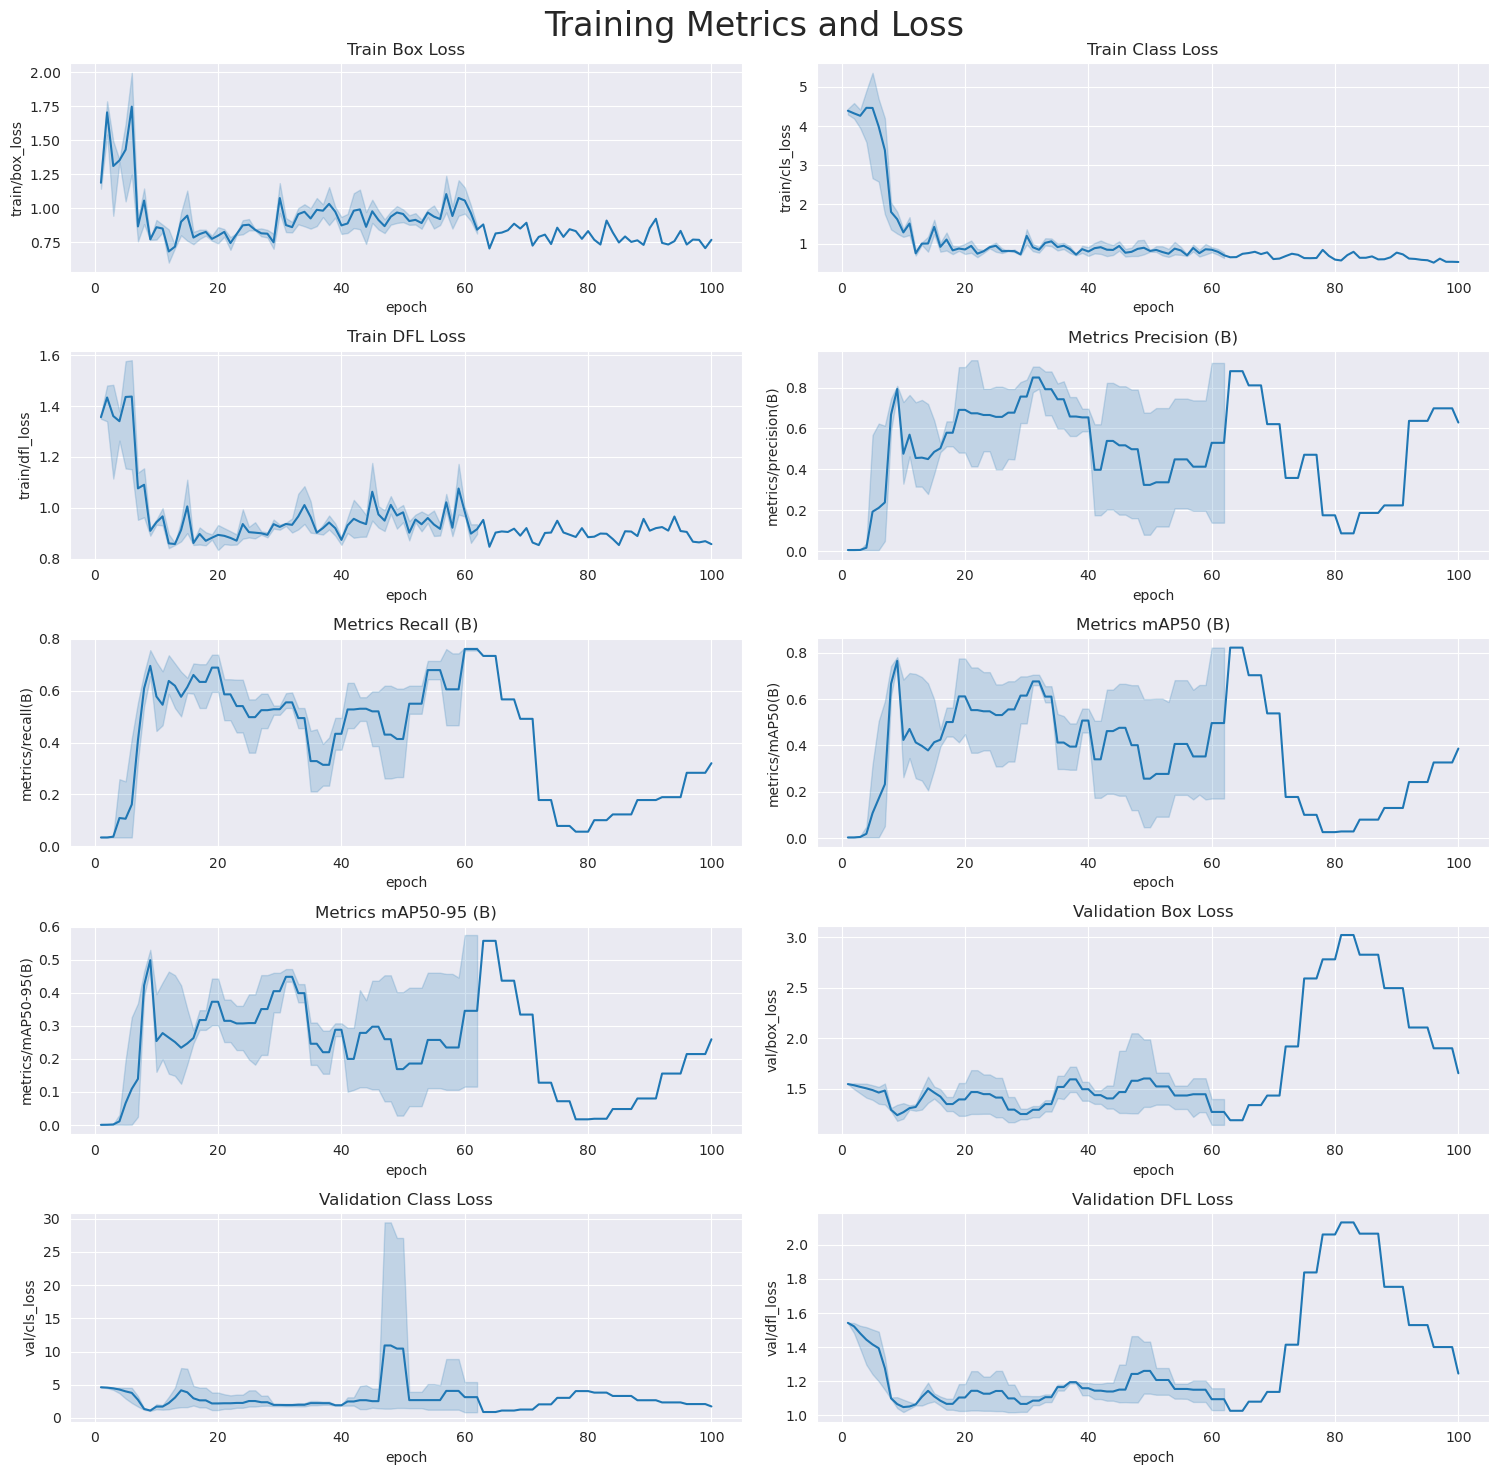

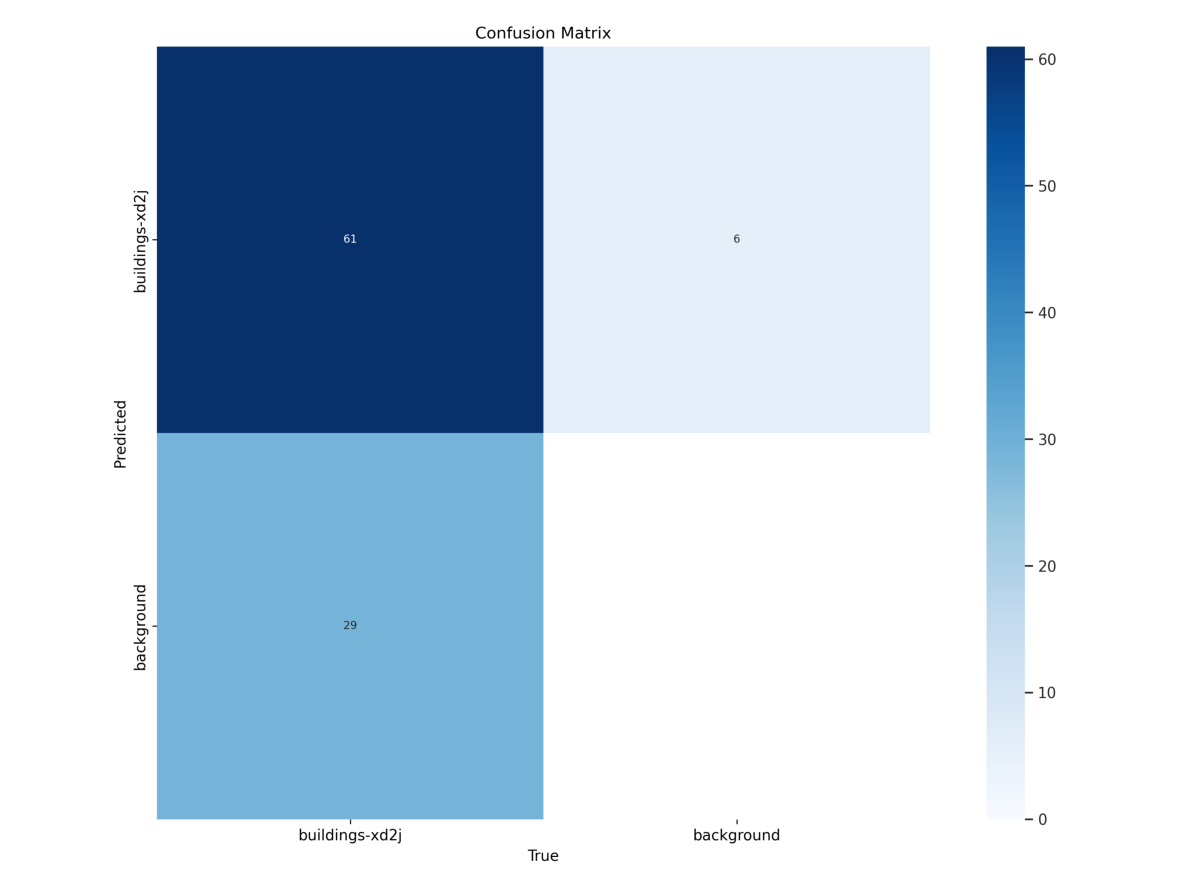

In [5]:
ylt.dsiplay_metrics(trial_name)


0: 640x640 7 buildings-xd2js, 7.5ms
Speed: 17.7ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


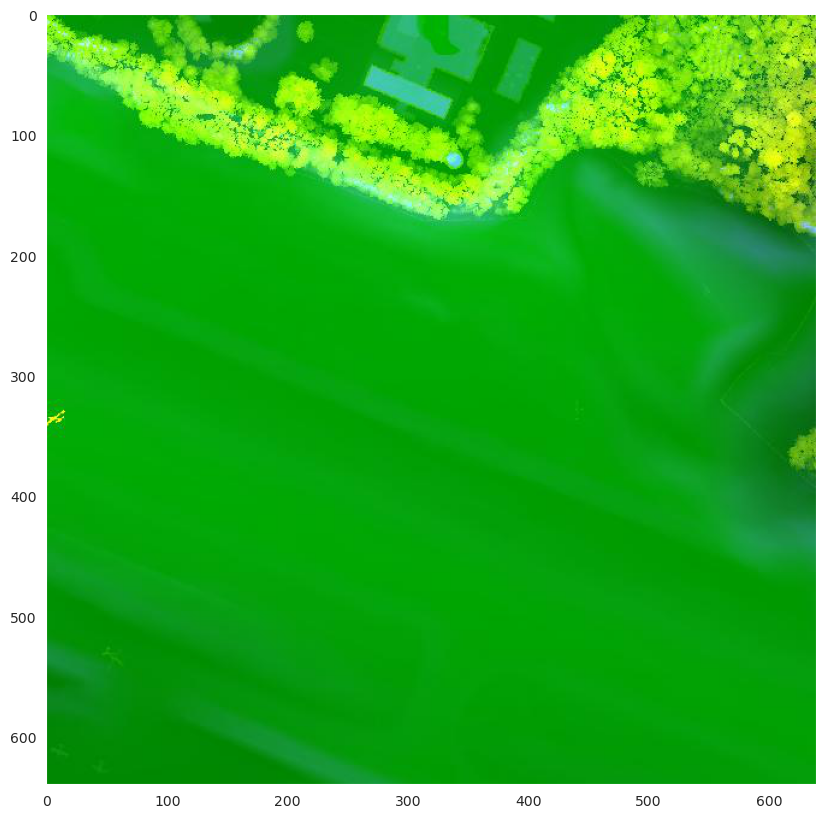

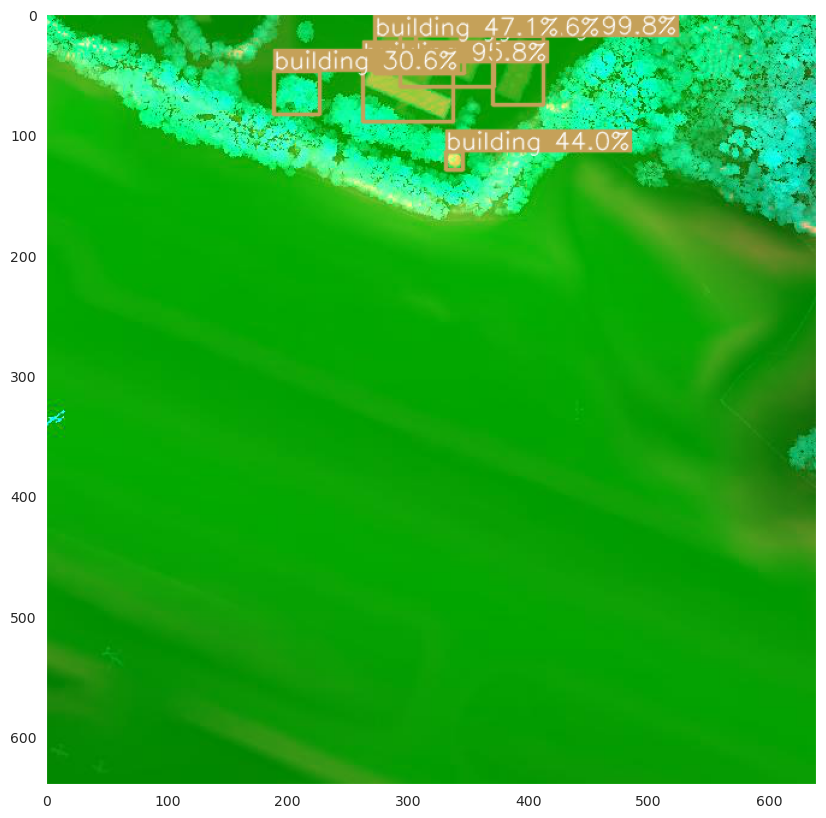

In [7]:
%matplotlib inline
fname = './datasets/LiDAR.v1i.yolov8/train/images/USGS_LPC_VA_ChesapeakeBay_2015_LAS_S13_4993_30_1_0_png.rf.99a9b239431857d1da7239213701fe72.jpg'
image = Image.open(fname)
imArr = np.asarray(image)
plt.figure()
plt.imshow(imArr)
plt.grid(False)
results = model.predict(source=image,
                        conf=0.25
                        )
plt.figure()
ylt.plot_bboxes(imArr.copy(), results[0].boxes.data, score=True)
plt.grid(False)


0: 640x640 130 buildings-xd2js, 10.2ms
Speed: 1.2ms preprocess, 10.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


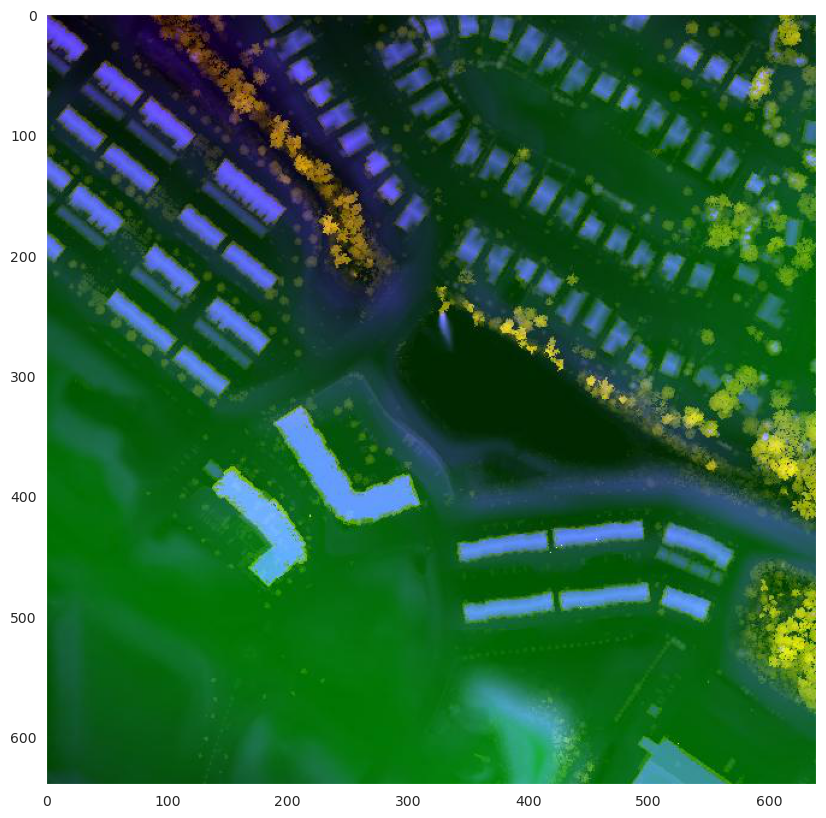

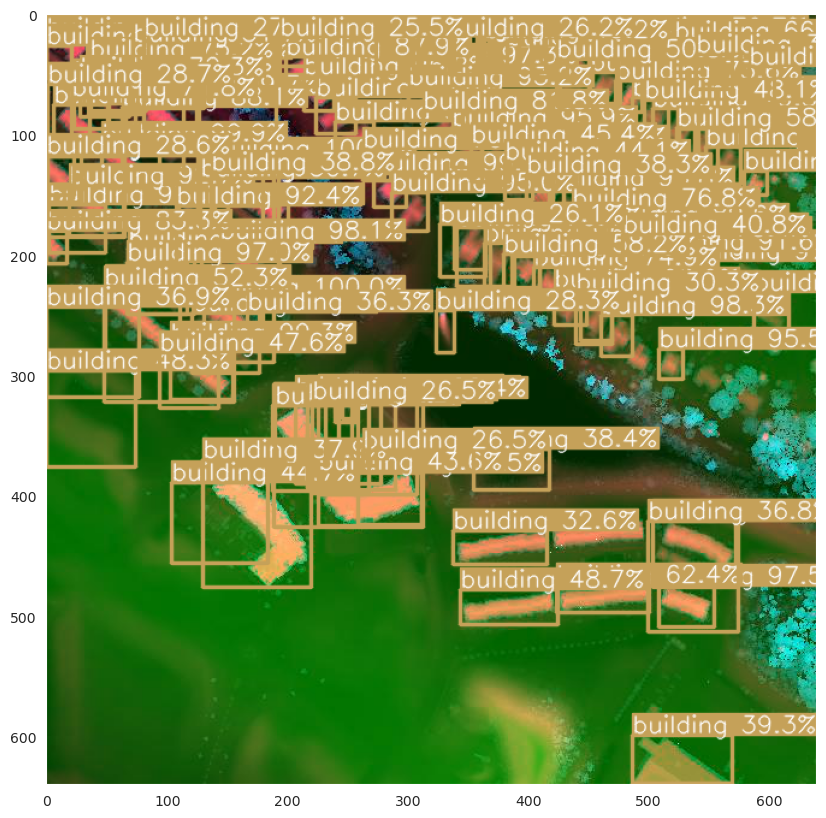

In [9]:
%matplotlib inline
fname = './datasets/LiDAR.v1i.yolov8/valid/images/USGS_LPC_VA_ChesapeakeBay_2015_LAS_S13_4993_30_0_2_png.rf.666dccd8524b9d72c3925ac55ed298df.jpg'
image = Image.open(fname)
imArr = np.asarray(image)
plt.figure()
plt.imshow(imArr)
plt.grid(False)
results = model.predict(source=image,
                        conf=0.25
                        )
plt.figure()
ylt.plot_bboxes(imArr.copy(), results[0].boxes.data, score=True)
plt.grid(False)


0: 640x640 31 buildings-xd2js, 6.9ms
Speed: 17.7ms preprocess, 6.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


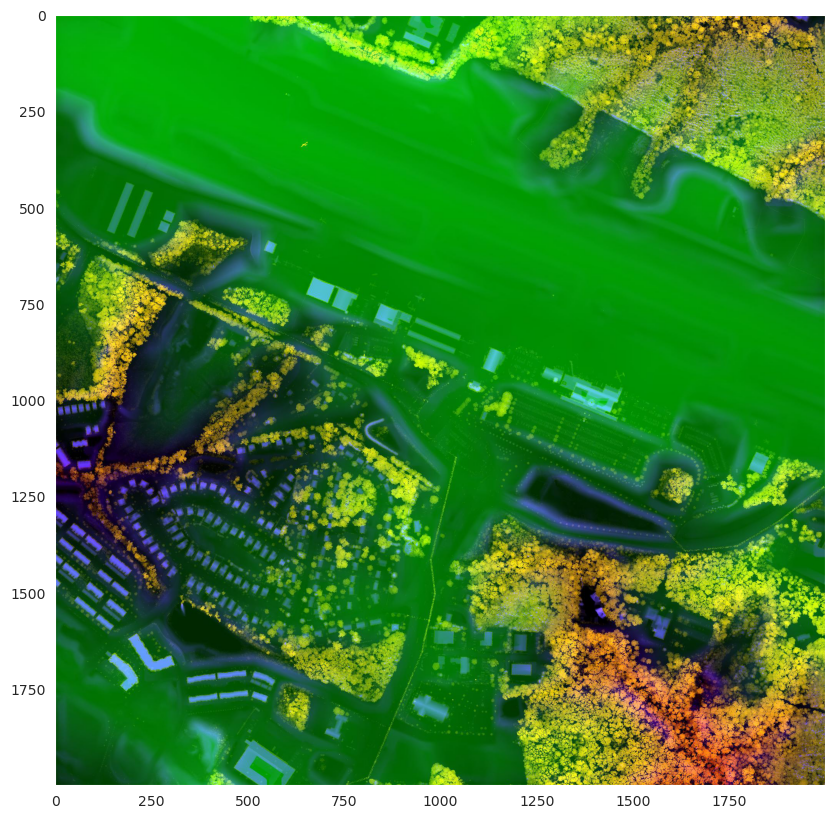

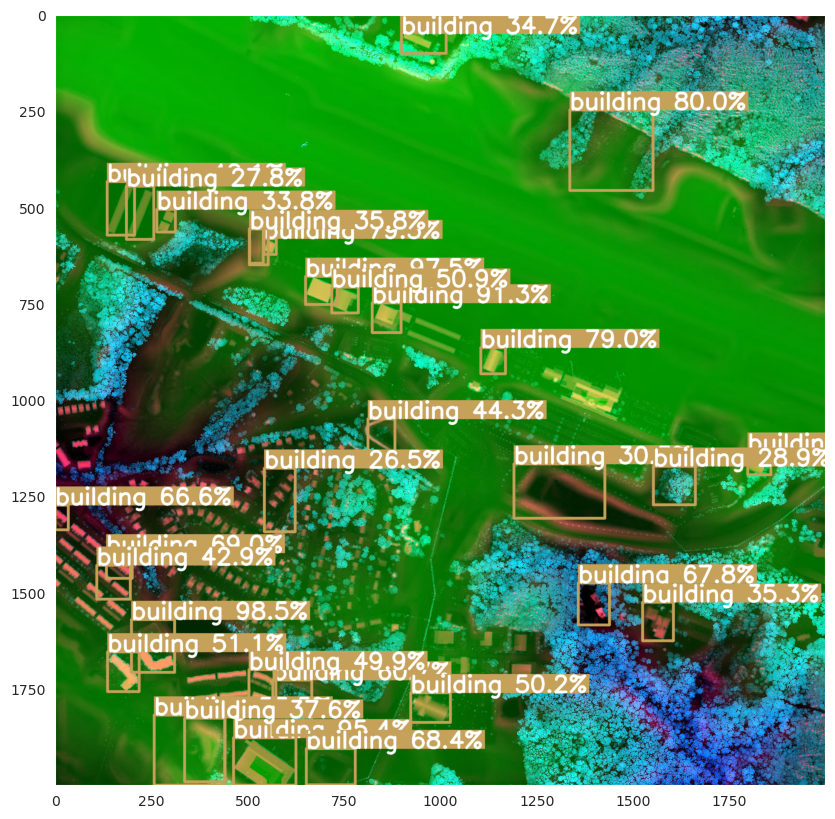

In [19]:
fname ='/workspaces/LiDAR/datasets/LiDAR Buildings.v1i.yolov8/valid/images/USGS_LPC_VA_ChesapeakeBay_2015_LAS_S13_4993_30_png.rf.08664480293687711b20df9f6a84af45.jpg'
image = Image.open(fname)
imArr = np.asarray(image)
plt.figure()
plt.imshow(imArr)
plt.grid(False)
results = model.predict(source=image,
                        conf=0.25
                        )
plt.figure()
ylt.plot_bboxes(imArr, results[0].boxes.data, score=True)
plt.grid(False)